$$ \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) . $$

$$\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$

Here C is $$\frac{1}{\lambda}$$

$$  J = \sum y^{i}*log(h(x^i)) + (1-y^{i})log(1-h(x^i))  $$

In [39]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
%matplotlib inline

In [2]:
iris_data = load_iris()

In [31]:
X = iris_data.data
y = iris_data.target

In [4]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Pick only two classes to start with lets pick setosa and versicolor

In [32]:
X = X[:100,:]
y = y[:100]

Text(0,0.5,'Class')

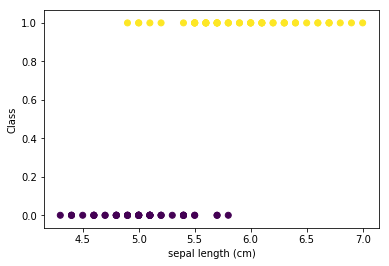

In [18]:
f,ax = plt.subplots(1,1)
ax.scatter(X[:,0],y,c=y)
ax.set_xlabel(iris_data.feature_names[0])
ax.set_ylabel("Class")

Odds ratio is Pa/(1-Pa)

log of odds is logit

$$log(P/(1-P)) = y $$

$$ e^y = \frac{P}{1-P} $$


$$ P = \frac{1}{1+e^{-y}} $$

### Sigmoid Function

In [22]:
x = np.linspace(-5,5,1000)

In [30]:
sigmoid_x = 1.0/(1.0 + np.exp(-x))

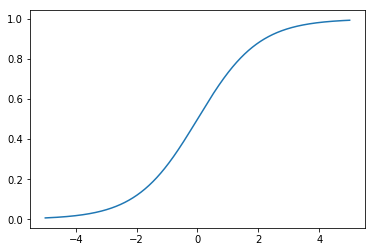

In [24]:
plt.plot(x,y)

In [27]:
expit?

Call signature:  expit(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'expit'>
File:            c:\users\hnambur\appdata\roaming\python\python36\site-packages\numpy\__init__.py
Docstring:      
expit(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

expit(x)

Expit ufunc for ndarrays.

The expit function, also known as the logistic function, is defined as
expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.

Parameters
----------
x : ndarray
    The ndarray to apply expit to element-wise.

Returns
-------
out : ndarray
    An ndarray of the same shape as x. Its entries
    are expit of the corresponding entry of x.

Notes
-----
As a ufunc expit takes a number of optional
keyword arguments. For more information
see `ufuncs <https://docs.scipy.org/doc/numpy/reference/ufuncs.html>`_

.. versionadded:: 0.10.0
Class docstring:
Functions that operate element by element on whole arrays.

To see the docum

In [33]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [72]:
binary_classifier = LogisticRegression(C = 1e4)

In [73]:
binary_classifier.fit(Xtrain[:,0].reshape(-1,1),ytrain)

C:\Users\hnambur\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
ypreds = binary_classifier.predict(Xtest[:,0].reshape(-1,1))

In [75]:
print(accuracy_score(ytest,ypreds))
print(recall_score(ytest,ypreds))
print(precision_score(ytest,ypreds))
print(f1_score(ytest,ypreds))
print(roc_auc_score(ytest,ypreds))

0.88
0.9090909090909091
0.8333333333333334
0.8695652173913043
0.8831168831168832


In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(ypreds,ytest)

array([[12,  1],
       [ 2, 10]], dtype=int64)

In [78]:
probs = binary_classifier.predict_proba(Xtest[:,0].reshape(-1,1))

In [81]:
probs.shape

(25, 2)

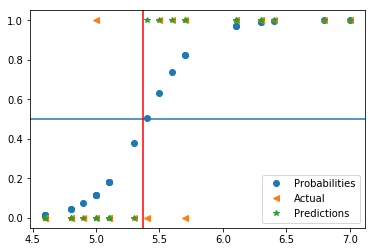

In [91]:
f,ax = plt.subplots(1,1)
ax.plot(Xtest[:,0],probs[:,1],'o',label="Probabilities")
ax.plot(Xtest[:,0],ytest,'<',label="Actual")
ax.plot(Xtest[:,0],ypreds,'*',label="Predictions")
ax.legend(loc='best')
ax.axhline(0.5)
ax.axvline(5.37,color='red')